# Zindi Class Project

# Loading the data

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]
sns.set(rc={'figure.figsize':(6,6)}) 

In [2]:
df = pd.read_csv('Train.csv')
#df.head()

# Cleaning the data

In [3]:
df.isnull().sum()
#seems to have no na values
df.fillna(0)
#removing columns that are redundant or don't have useful information to us
#unspecified and N/A are pretty much the same for our purposes
df = df.drop(columns = ["pw_07", "pw_08","dw_00","dw_11", "psa_02", "psa_04", "lan_14"])
df.drop_duplicates(keep = "first")

,ward,total_households,total_individuals,target,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,...,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,...,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,...,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,...,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,...,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,ZA4161005,-29.409381,25.290165,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817,34503001: Ward 1,3261.68067,11551.56486,6.393480,0.003146,0.017230,0.004735,0.048888,0.000654,0.017798,...,0.074058,0.000472,0.000472,0.000472,0.000000,0.006203,ZA3453001,-27.675590,23.057920,9.118927
2818,34503002: Ward 2,1463.06432,7908.90411,15.668000,0.002262,0.010433,0.000000,0.003030,0.000000,0.008028,...,0.557859,0.003467,0.003030,0.000713,0.000000,0.008414,ZA3453002,-27.591408,22.907161,1.697395
2819,34503003: Ward 3,1395.18881,6242.37527,13.238795,0.006601,0.061118,0.000812,0.003912,0.000812,0.017205,...,0.326884,0.046445,0.002150,0.001458,0.000000,0.003670,ZA3453003,-27.952550,22.749698,2.792501
2820,34503004: Ward 4,1679.66964,8014.73089,17.639523,0.004423,0.016099,0.000000,0.000674,0.000000,0.006907,...,0.301241,0.108998,0.009235,0.007870,0.000000,0.004803,ZA3453004,-27.913875,22.755314,2.793699


# Correlations

<AxesSubplot:>

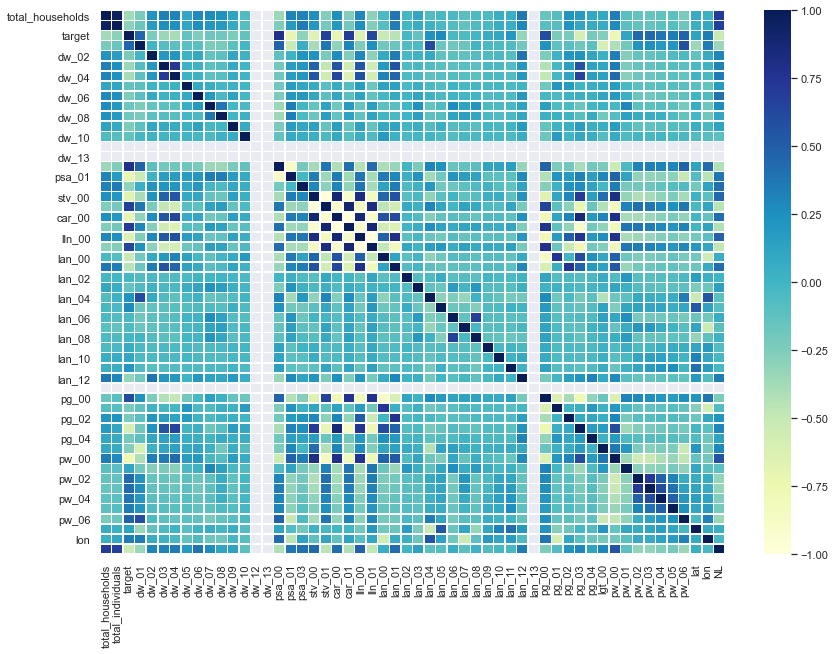

In [21]:
corr = df.corr()

plt.figure(figsize = (14, 10))
sns.heatmap(corr, cmap="YlGnBu", linewidths=.5)

positive correlations

In [28]:
df.corr()['target'].sort_values(ascending=False).head()

target    1.000000
psa_00    0.782472
car_01    0.702831
stv_01    0.664181
lln_01    0.637835
Name: target, dtype: float64

In [29]:
#putting positive correlation data into a data frame called corr1
corr1 = pd.DataFrame(df.corr()['target'].sort_values(ascending=False))
#keeping only the variables w correlation score > 0.5
corr1 = corr1[corr1['target'] > 0.5]
high_corr = corr1.index
high_corr

Index(['target', 'psa_00', 'car_01', 'stv_01', 'lln_01', 'pg_00'], dtype='object')

<AxesSubplot:xlabel='psa_00', ylabel='target'>

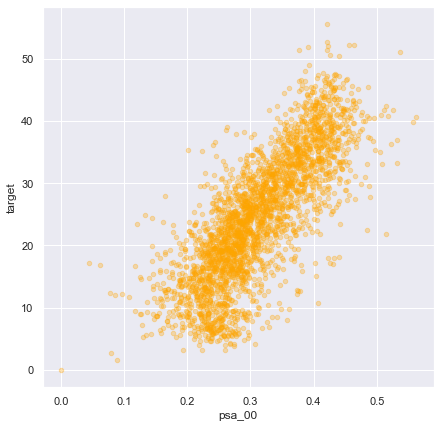

In [25]:
df.plot(x='psa_00', y='target', kind='scatter', alpha=0.3, color = "orange", figsize=(7, 7))

<AxesSubplot:xlabel='pg_00', ylabel='target'>

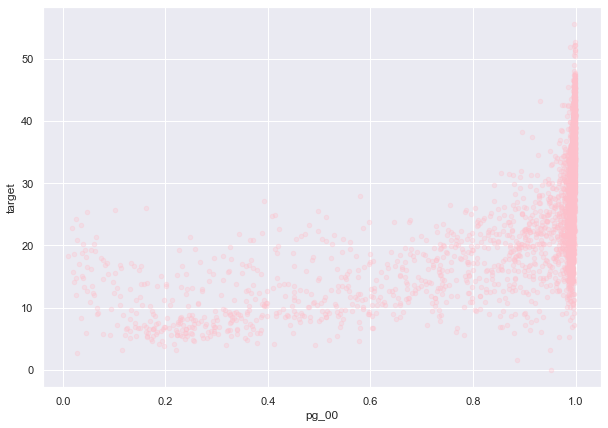

In [42]:
df.plot(x='pg_00', y='target', kind='scatter', alpha=0.3, color = "pink", figsize=(10, 7))

negative correlations

In [30]:
#correlation data into a data frame called corr2
corr2 = pd.DataFrame(df.corr()['target'].sort_values(ascending=False))
corr2 = corr2[corr2['target'] < -0.5]
low_corr = corr2.index
low_corr

Index(['lan_00', 'NL', 'pg_03', 'lln_00', 'stv_00', 'car_00', 'psa_01',
       'pw_00'],
      dtype='object')

<AxesSubplot:xlabel='lan_00', ylabel='target'>

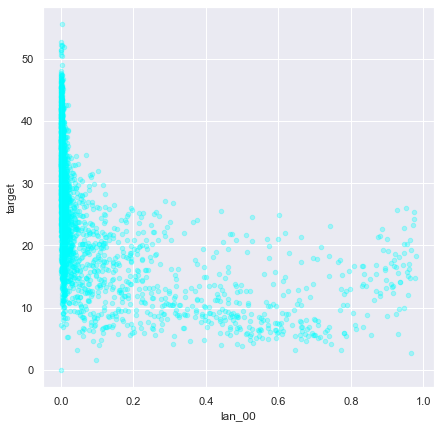

In [45]:
df.plot(x='lan_00', y='target', kind='scatter', alpha=0.3, color = "cyan", figsize=(7, 7))

<AxesSubplot:xlabel='pw_00', ylabel='target'>

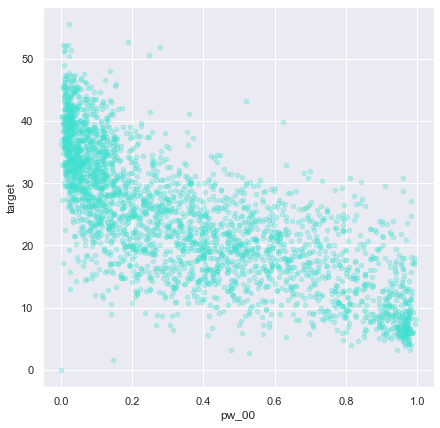

In [46]:
df.plot(x='pw_00', y='target', kind='scatter', alpha=0.3, color = "turquoise", figsize=(7, 7))

In [31]:
strong_corr = df[['target', 'psa_00', 'car_01', 'stv_01', 'lln_01', 'pg_00', 'lan_00', 'NL', 'pg_03', 'lln_00', 'stv_00', 'car_00', 'psa_01', 'pw_00']]
#strong_corr

# Linear Regression Modelling

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [33]:
#for the most correlated columns
X = strong_corr.drop(columns = "target")
y  = strong_corr['target']
# y is same as before: y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size  = 0.25, random_state = 42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

X = X_test.reset_index().copy() # make a copy of indices and data
X["target"] = y_test.tolist()
X["prediction"] = predictions
#X

In [34]:
model_r2 = metrics.r2_score(y_test, predictions)
model_r2

0.833627137276876

In [35]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
rmse

4.090453126826456

In [13]:
# #for all the numerical columns we kept
X = df.drop(columns = ['ward', 'target', 'ADM4_PCODE'] )
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size  = 0.20, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)
#fitting the model on training data

test_data = pd.read_csv("Test.csv")
X_test_data = test_data.drop(['ward','ADM4_PCODE', "pw_07", "pw_08","dw_00","dw_11", "psa_02", "psa_04", "lan_14"], axis=1)

In [14]:
predictions = model.predict(X_test)    #Train.csv
predictions_test = model.predict(X_test_data)     #Test.csv
#using model fitted from training data to predict testing data

In [15]:
X = X_test.reset_index().copy()
X["predictions"] = predictions
X["target"] = y_test.tolist()

X2 = X_test_data.reset_index().copy()
X2["predictions"] = predictions_test

In [16]:
# combine X features from train data and test data
X_full = pd.concat([X, X2], ignore_index=True) 
X_full

,index,total_households,total_individuals,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,...,pw_02,pw_03,pw_04,pw_05,pw_06,lat,lon,NL,predictions,target
0,1091,1866.23138,7326.74439,0.312948,0.079501,0.001186,0.000000,0.001378,0.006144,0.019733,...,0.147534,0.027203,0.019997,0.001985,0.062959,-30.118707,29.282388,0.000000,25.120224,15.867901
1,2510,3011.80828,11531.75832,0.046439,0.009159,0.002819,0.000000,0.011571,0.005189,0.038423,...,0.178788,0.041328,0.029294,0.016458,0.146579,-26.078382,25.839042,15.773764,18.696669,14.744632
2,1474,9346.73735,39175.99195,0.091124,0.002353,0.003708,0.001636,0.011389,0.010406,0.049961,...,0.078510,0.022518,0.024142,0.003813,0.079092,-29.970421,30.840556,35.747076,23.232309,25.767571
3,1437,6846.22121,30924.03809,0.008494,0.002448,0.001656,0.005862,0.000348,0.043820,0.014529,...,0.003056,0.001430,0.000598,0.000611,0.012393,-29.730505,30.978227,54.992047,24.890993,27.705788
4,1105,2537.75340,11645.69910,0.801225,0.009654,0.000000,0.000403,0.000000,0.007691,0.004253,...,0.346921,0.078985,0.040369,0.014663,0.406589,-30.311653,30.308249,3.922369,36.213647,42.524363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,1008,16076.89903,43296.51372,0.002827,0.207749,0.028813,0.069741,0.010701,0.003941,0.000804,...,0.000609,0.000392,0.000291,0.000148,0.002277,-33.806524,18.496094,33.913055,5.926189,NaN
1574,1009,17470.24004,53538.12816,0.000824,0.001189,0.000870,0.000554,0.000370,0.001954,0.088044,...,0.158056,0.030744,0.008313,0.000348,0.022417,-33.982120,18.673308,60.009486,18.461934,NaN
1575,1010,9467.25336,40332.11708,0.007184,0.066458,0.001003,0.000371,0.150977,0.007699,0.099672,...,0.035879,0.003850,0.000990,0.000352,0.010670,-34.062704,18.767457,35.834860,14.205700,NaN
1576,1011,6111.31195,27793.92916,0.002216,0.101188,0.001517,0.000939,0.158979,0.013516,0.076050,...,0.015737,0.000559,0.000000,0.000204,0.026741,-34.057772,18.487893,50.153301,8.930775,NaN


In [17]:
mae = metrics.mean_absolute_error(y_test, predictions)
mae

2.9073690890095394

In [18]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
rmse

3.749168706080052

In [19]:
#metrics: r2
model_r2 = metrics.r2_score(y_test, predictions)
model_r2

0.8575210689769485

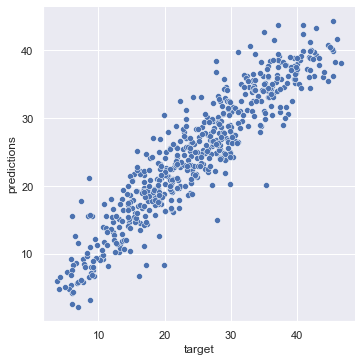

In [20]:
sns.relplot(x="target", y="predictions", data=X, kind="scatter")

# Random Forest Generation Modelling

In [23]:
import warnings
warnings.simplefilter("ignore")
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from math import sqrt

In [24]:
# Define input columns
in_cols = df.drop('ADM4_PCODE', axis=1).columns[4:]
ycol = 'target'
in_cols

Index(['dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08',
       'dw_09', 'dw_10', 'dw_12', 'dw_13', 'psa_00', 'psa_01', 'psa_03',
       'stv_00', 'stv_01', 'car_00', 'car_01', 'lln_00', 'lln_01', 'lan_00',
       'lan_01', 'lan_02', 'lan_03', 'lan_04', 'lan_05', 'lan_06', 'lan_07',
       'lan_08', 'lan_09', 'lan_10', 'lan_11', 'lan_12', 'lan_13', 'pg_00',
       'pg_01', 'pg_02', 'pg_03', 'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02',
       'pw_03', 'pw_04', 'pw_05', 'pw_06', 'lat', 'lon', 'NL'],
      dtype='object')

In [25]:
rf = RandomForestRegressor(n_estimators=100) 
rf.fit(df[in_cols][:-1000], df[ycol][:-1000])

RandomForestRegressor()

In [26]:
rf.score(df[in_cols][-1000:], df[ycol][-1000:]) 
#1.0 is best possible score

0.8132171804491988

In [27]:
print("RMSE:", sqrt(mean_squared_error(df[ycol][-1000:], rf.predict(df[in_cols][-1000:]))))

RMSE: 4.124851922965769


# Cross Validation 

In [28]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False)
for train, test in kf.split(df):
  print(df.iloc[train].shape, df.iloc[test].shape)

(2257, 56) (565, 56)
(2257, 56) (565, 56)
(2258, 56) (564, 56)
(2258, 56) (564, 56)
(2258, 56) (564, 56)


In [29]:
kf = KFold(n_splits=5, shuffle=False)
scores = []
for train, test in kf.split(df):
  rf = RandomForestRegressor(n_estimators=100)
  rf.fit(df[in_cols].iloc[train], df[ycol].iloc[train])
  rmse = sqrt(mean_squared_error(df[ycol].iloc[test], rf.predict(df[in_cols].iloc[test])))
  scores.append(rmse)
  print(rmse)
print("Average score in 5-fold CV:", np.mean(scores))

3.8431912150162524
3.4930383681098776
4.576787135083656
4.282333658242829
3.8921078841797536
Average score in 5-fold CV: 4.017491652126474


# Feature Engineering

In [23]:
df['percent_with_car'] = df['car_00']*df["total_individuals"]/df['total_individuals']

In [24]:
df['English_speakers'] = df['lan_01']*df["total_individuals"]/df["total_individuals"]

In [25]:
df['Informal_dwelling'] = df['dw_08']*df["total_individuals"]/df["total_individuals"]

In [26]:
df['Phone_access'] = df['lln_00']*df["total_individuals"]/df["total_individuals"]

In [27]:
df['Water_access'] = (1- df['pw_06']*df["total_individuals"])/df["total_individuals"]

In [28]:
df['Non_English'] = (1- df["lan_01"])

In [ ]:
in_cols = df.drop('ADM4_PCODE', axis=1).columns[4:]
in_cols # Check that the new feature is included

# Cross Validation after Feature Engineering 

In [63]:
# Test in CV
kf = KFold(n_splits=5, shuffle=False)
scores = []
for train, test in kf.split(df):
  rf = RandomForestRegressor(n_estimators=100)
  rf.fit(df[in_cols].iloc[train], df[ycol].iloc[train])
  rmse = sqrt(mean_squared_error(df[ycol].iloc[test], rf.predict(df[in_cols].iloc[test])))
  scores.append(rmse)
print("Average score in 5-fold CV:", np.mean(scores))

Average score in 5-fold CV: 4.020121480354427


In [64]:
for md in [15, 18, 21, 24, 27]:
  scores = []
  for train, test in kf.split(df):
    rf = RandomForestRegressor(n_estimators=100, max_depth=md)
    rf.fit(df[in_cols].iloc[train], df[ycol].iloc[train])
    rmse = sqrt(mean_squared_error(df[ycol].iloc[test], rf.predict(df[in_cols].iloc[test])))
    scores.append(rmse)
  print("Average score in 5-fold CV:", np.mean(scores), "for max depth:", md)

Average score in 5-fold CV: 4.0358765211741465 for max depth: 15
Average score in 5-fold CV: 4.016293003171972 for max depth: 18
Average score in 5-fold CV: 4.020570321657768 for max depth: 21
Average score in 5-fold CV: 4.020224950019222 for max depth: 24
Average score in 5-fold CV: 4.022866470264294 for max depth: 27


# Clustering

In [28]:
df_test = pd.read_csv('Test.csv')
#df_test

In [29]:
all_data = pd.concat([df, df_test], 0)

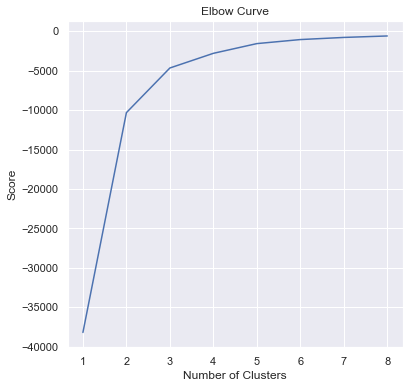

In [32]:
from sklearn.cluster import KMeans
K_clusters = range(1,9)

#range is shifted from 0-4 to 1-5 to avoid infinity-type error

kmeans = [KMeans(n_clusters = i) for i in K_clusters]

Y_axis = all_data[['lat']]
X_axis = all_data[['lon']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualization

plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

This Elbow Curve shows the optimal amount of clusters. After 5, the complexity plateaus, and adding additional clusters would be redundant. 

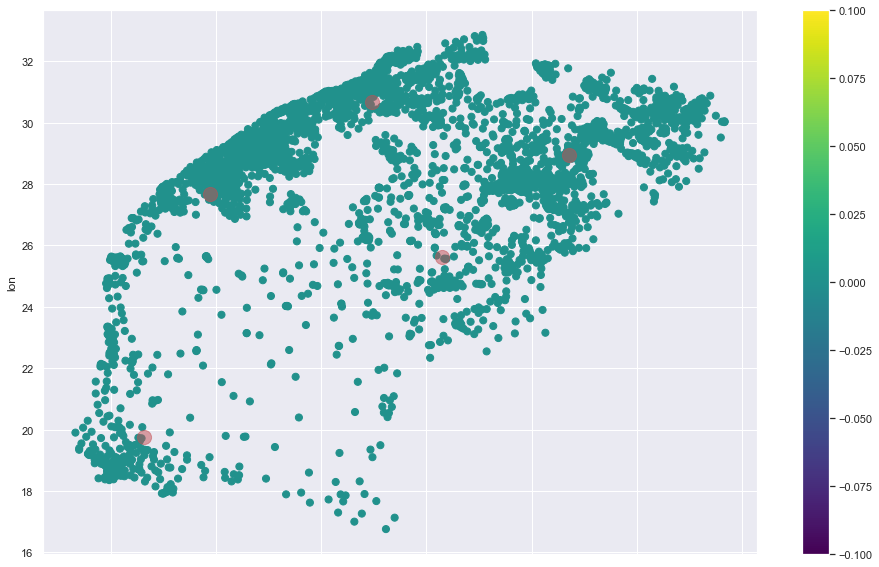

In [38]:
# Using geolocation, coordinates are organized into 5 clusters (0 - 4). These clusters allow for the examination
# of levels of poverty in relation to highly-correlating variables. 

kmeans = KMeans(n_clusters = 5, init ='k-means++')
kmeans.fit(all_data[['lat','lon']])
all_data['cluster_label'] = kmeans.fit_predict(all_data[['lat','lon']])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(all_data[['lat','lat']])
# Full_data['cluster_label'].value_counts()
all_data.plot.scatter(x = 'lat', y = 'lon', c = labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='r', s=200, alpha=0.5)

In [36]:
all_data['cluster_label'].value_counts()

0    1430
2     847
3     591
4     536
1     431
Name: cluster_label, dtype: int64

# K-Means Geospacial Clustering Data Preparation

In [30]:
#Normalize numerical data
from sklearn.preprocessing import MinMaxScaler

numerical_data_normalized = MinMaxScaler().fit_transform(numerical_data) # this line scales our data

numerical_data_normalized = pd.DataFrame(              #this pops it back in data frame format 
                    numerical_data_normalized,
                    columns=numerical_data.columns) 

numerical_data_normalized.head()

NameError: name 'numerical_data' is not defined

In [ ]:
numerical_data_no_lat_long_normalized = MinMaxScaler().fit_transform(numerical_data_no_lat_long) # this line scales our data

numerical_data_normalized = pd.DataFrame(              #this pops it back in data frame format 
                    numerical_data_no_lat_long,
                    columns=numerical_data_no_lat_long.columns)
numerical_data_no_lat_long.head()

# MiniBatchKMeans

In [6]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import seaborn as sns

range_k = [2, 3, 4, 5, 8, 10, 15, 20, 25, 30]
results_k = {}
for k in range_k:
    km = MiniBatchKMeans(n_clusters=k)
    km.fit_predict(numerical_data_no_lat_long)
    results_k[k] = km.inertia_

#ssd = []
#for i in range(2, 26):
    #km = MiniBatchKMeans(n_clusters=i)
    #km.fit_predict(numerical_data_no_lat_long)
    #ssd.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(
    [c[0] for c in results_k.items()],
    [c[1] for c in results_k.items()], label="Inertia", color="red", marker='o')
ax.set_xlabel("K")
ax.set_ylabel("Sum of Squared Distances")
ax.set_title("Inertia by K")
ax.legend()

NameError: name 'numerical_data' is not defined

In [7]:
! pip install geopandas

NameError: name 'numerical_data_no_lat_long' is not defined

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Convert it to a GeoDataFrame by transforming the Latitude/Longitude coordinates 
loc_crs = {'init': 'epsg:4326'}
loc_geom = [Point(xy) for xy in zip(X_full['lon'], X_full['lat'])]
geo_df = gpd.GeoDataFrame(X_full, crs=loc_crs, geometry=loc_geom)

# Plot the GeoDataFrame
geo_df.plot()

In [ ]:
X_full.plot(kind="scatter", x="lon", y="lat", alpha=0.4, figsize=(10,7),
    c="predictions", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

In [3]:
train_data.plot(kind="scatter", x="lon", y="lat", alpha=0.4, figsize=(10,7),
    c="target", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

NameError: name 'numerical_data_no_lat_long' is not defined